
# Time Series

A time series is a sequence of data points collected at specific time intervals. In other words, it's a dataset where each data point is associated with a particular timestamp or time period. Time series data is used to observe how a variable changes over time and to identify patterns, trends, and fluctuations in that variable. This type of data is commonly encountered in various fields such as economics, finance, physics, biology, weather forecasting, and more.

Time series data can be univariate or multivariate. Univariate time series involves a single variable measured over time, while multivariate time series involves multiple variables measured over the same time intervals. The primary goal when analyzing time series data is often to forecast future values based on the patterns observed in the historical data.

Some common examples of time series data include:

1. **Stock Prices**: Daily closing prices of a company's stock over a period of time.
2. **Weather Data**: Daily temperature readings recorded at a specific location.
3. **Economic Indicators**: Monthly unemployment rates over several years.
4. **Web Traffic**: Hourly website visitors over a week.
5. **Sensor Readings**: Time-stamped measurements from sensors in industrial processes.
6. **Healthcare Data**: Daily patient admissions to a hospital.
7. **Social Media Activity**: Hourly tweet counts related to a specific topic.

Analyzing time series data involves various techniques, including:

1. **Descriptive Analysis**: Identifying trends, seasonality, and anomalies in the data.
2. **Forecasting**: Using historical patterns to predict future values of the time series.
3. **Smoothing**: Applying techniques to remove noise and highlight underlying trends.
4. **Decomposition**: Separating a time series into its trend, seasonality, and residual components.
5. **Statistical Models**: Utilizing techniques like ARIMA (AutoRegressive Integrated Moving Average) for forecasting.
6. **Machine Learning**: Employing algorithms like recurrent neural networks (RNNs) and Long Short-Term Memory (LSTM) networks for more complex analyses.

Time series analysis plays a crucial role in making informed decisions, predicting outcomes, and understanding the behavior of various phenomena that evolve over time.

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
#loading the time series data
data = pd.read_csv('AirPassengers.csv')

In [3]:
#EDA on the time series data
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
data['Month'] = pd.to_datetime(data['Month'])  #converting month column str to datetime
data.index = data['Month'] #making month column as a index column


In [8]:
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [9]:
del data['Month']

In [10]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

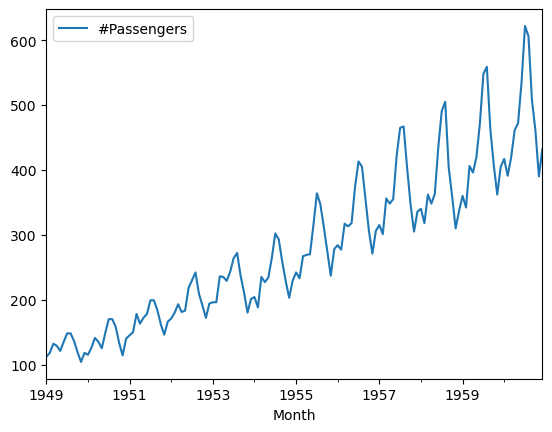

In [11]:
#plotting the time series
data.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation ')

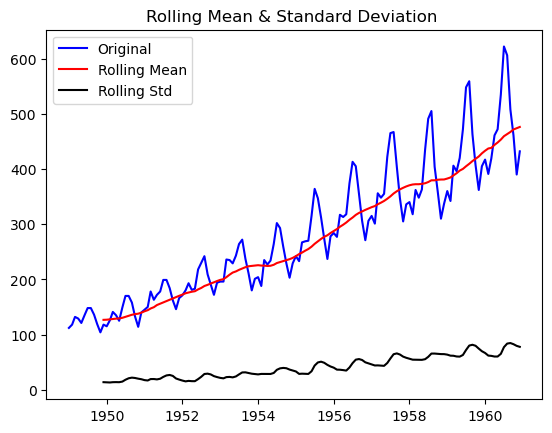

In [12]:
mean = data.rolling(window=12).mean()  #12 month averge(mean)
std = data.rolling(window=12).std()    #12 month devaiation from mean or (std)

plt.plot(data, color='blue', label='Original')
plt.plot(mean, color='red', label='Rolling Mean')
plt.plot(std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation ')

In [13]:
mean.head(13)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [14]:
std

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,83.630500
1960-09-01,84.617276
1960-10-01,82.541954


In [65]:
#ADF-P value LESS (0.05)
#KPSS- P value GREATER(0.05)

In [15]:
#checking the stationarity of the series
#adfuller test if checking the data is stationarity or not
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['#Passengers'])
result

(0.8153688792060502,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [16]:
p_value=result[1]
p_value

0.991880243437641

In [17]:
#iterpret the p value
if p_value <=0.05:
    print('Stationarity is present')
else:
    print('NO Stationarity is present')

NO Stationarity is present


<Axes: xlabel='Month'>

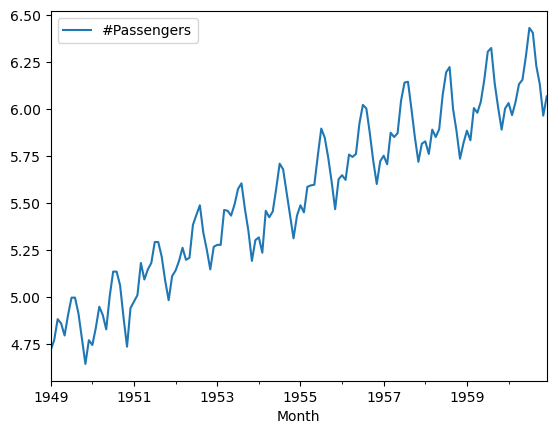

In [18]:
#logrithmic comutation to make the time series stationary
first_log = np.log(data)
#first_log = first_log.dropna()
first_log.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

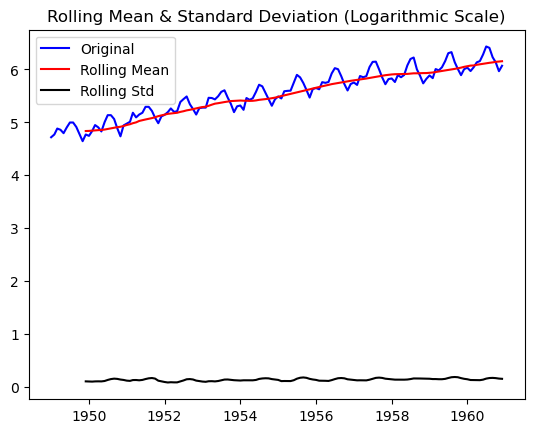

In [19]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

plt.plot(first_log, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [20]:
new_data = first_log - mean_log

In [21]:
new_data = new_data.dropna()
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [22]:
#adfuller test for stationarity
result = adfuller(new_data['#Passengers'])
print(result[1])

0.022234630001242536


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

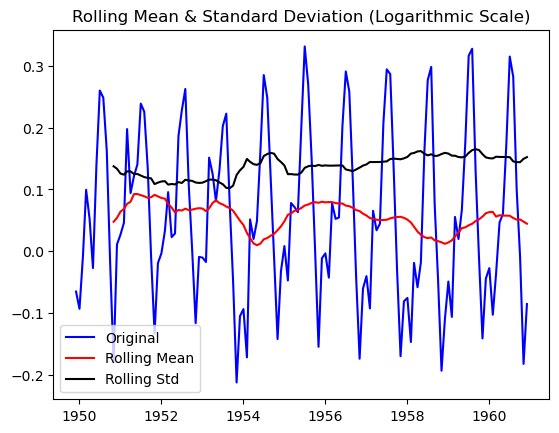

In [23]:
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

plt.plot(new_data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [24]:
result = adfuller(new_data['#Passengers'])
print(result[1])

0.022234630001242536


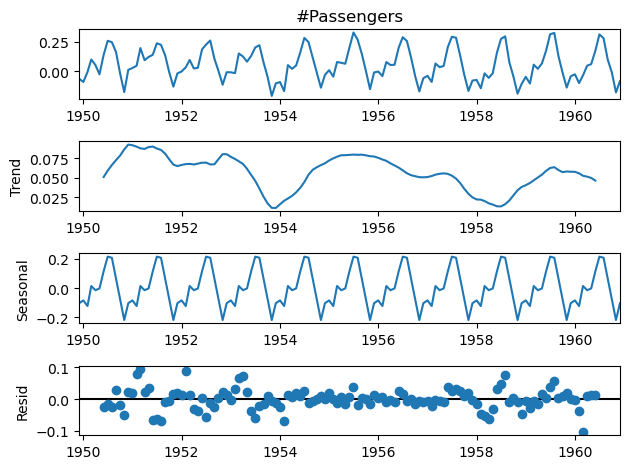

In [25]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(new_data['#Passengers'].dropna())

decompose_result.plot();

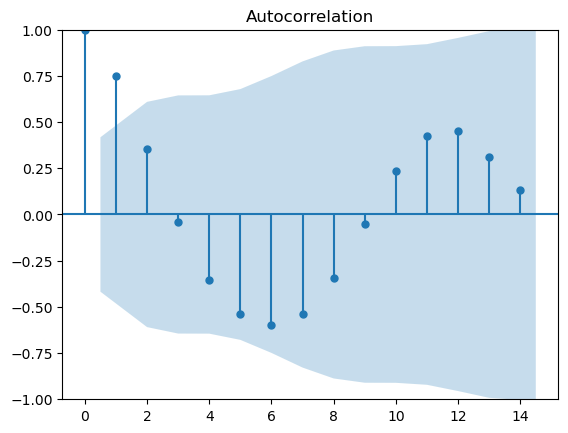

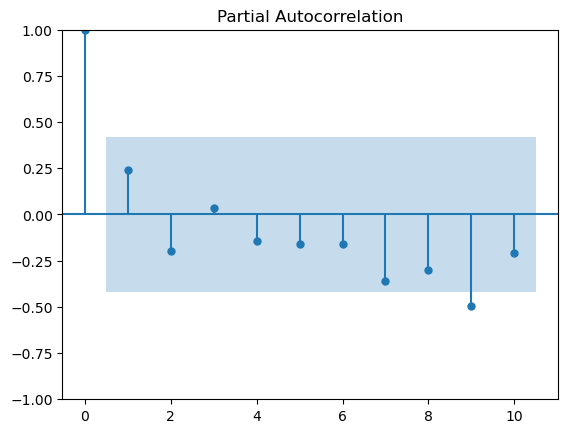

In [28]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot=acf(new_data)
pacf_plot=pacf(new_data)
plot_acf(acf_plot);
plot_pacf(pacf_plot, lags = 10);

In [29]:
!pip install pmdarima
!pip install statsmodels


In [30]:
from pmdarima import auto_arima

In [31]:
model = auto_arima(data, seasonal=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

In [32]:
#0-120
#121-144

In [64]:
from statsmodels.tsa.arima.model import ARIMA  #AR=autoregressive, I=intergrated, MA=moving averge

train = new_data.iloc[:120]['#Passengers']
test = new_data.iloc[121:]['#Passengers']

model = ARIMA(train, order=(4,0,3))  #(p,d,q),p=autoregressive,d=differencing,q=moving average
# d = 0 bcz differencing is done above once
model_fit = model.fit()
model_fit.summary()

C:\Users\priyam jain\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\priyam jain\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\priyam jain\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\priyam jain\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\priyam jain\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optim

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(4, 0, 3)   Log Likelihood                 132.974
Date:                Sun, 01 Oct 2023   AIC                           -247.947
Time:                        17:27:15   BIC                           -222.860
Sample:                    12-01-1949   HQIC                          -237.759
                         - 11-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0564      0.012      4.810      0.000       0.033       0.079
ar.L1          1.6210      0.459      3.533      0.000       0.722       2.520
ar.L2         -0.1521      0.364     -0.418      0.676      -0.866       0.562
ar.L3         -1.1006      0.271     -4.054      0.000      -1.633      -0.569
ar.L4          0.6141      0.280      2.195      0.028       0.066       1.162
ma.L1         -0.7609      0.506     -1.504      0.133      -1.753       0.231
ma.L2         -0.9828      0.123     -7.963      0.000      -1.225      -0.741
ma.L3          0.7539      0.412      1.830      0.067      -0.054       1.561
sigma2         0.0062      0.001      4.955      0.000       0.004       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 5.11
Prob(Q):                              0.76   Prob(JB):                         0.08
Heteroskedasticity (H):               1.06   Skew:                             0.14
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

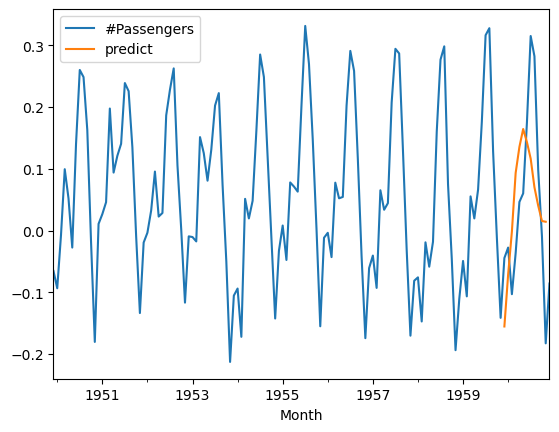

In [70]:
new_data['predict'] = model_fit.predict(start= len(train),
                                    end=len(train)+len(test)- 1,
                                    dynamic=True)
new_data[['#Passengers','predict']].plot()

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(4,0,3), seasonal_order=(4,0,3,12))
model = model.fit()

C:\Users\priyam jain\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\priyam jain\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\priyam jain\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\priyam jain\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\priyam jain\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Con

<Axes: xlabel='Month'>

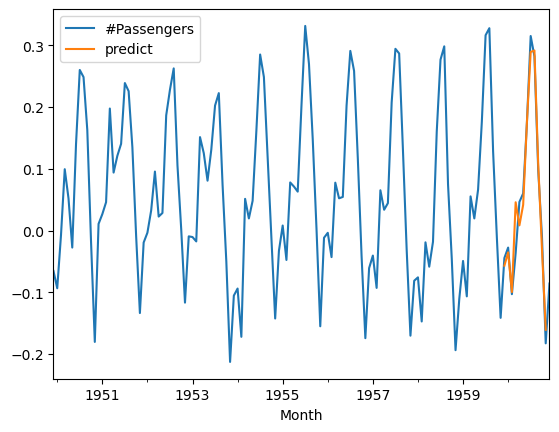

In [72]:
new_data['predict'] = model.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1,
                                                       dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

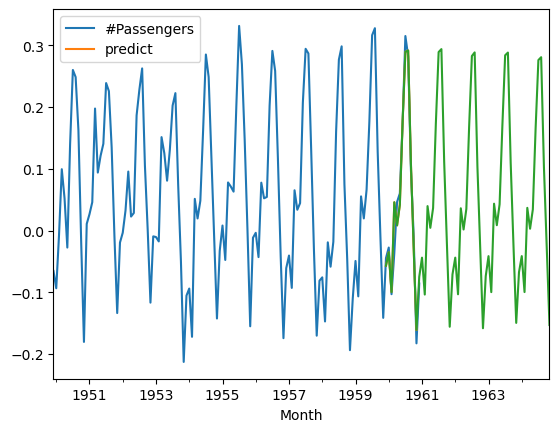

In [73]:
#predicting the projections for the next 5 years
forecast = model.forecast(steps=60)
new_data.plot()
forecast.plot()

In [86]:
forecast

1959-12-01   -0.058480
1960-01-01   -0.035221
1960-02-01   -0.097358
1960-03-01    0.046419
1960-04-01    0.010823
1960-05-01    0.042114
1960-06-01    0.176612
1960-07-01    0.290408
1960-08-01    0.291440
1960-09-01    0.108567
1960-10-01   -0.027355
1960-11-01   -0.159778
1960-12-01   -0.071768
1961-01-01   -0.041352
1961-02-01   -0.099985
1961-03-01    0.042151
1961-04-01    0.007324
1961-05-01    0.038438
1961-06-01    0.173223
1961-07-01    0.289055
1961-08-01    0.292513
1961-09-01    0.110939
1961-10-01   -0.024119
1961-11-01   -0.156959
1961-12-01   -0.070758
1962-01-01   -0.042140
1962-02-01   -0.099380
1962-03-01    0.041529
1962-04-01    0.007693
1962-05-01    0.038541
1962-06-01    0.169840
1962-07-01    0.283496
1962-08-01    0.286990
1962-09-01    0.106383
1962-10-01   -0.025236
1962-11-01   -0.155746
1962-12-01   -0.070315
1963-01-01   -0.040733
1963-02-01   -0.098107
1963-03-01    0.042289
1963-04-01    0.008679
1963-05-01    0.040253
1963-06-01    0.169753
1963-07-01 